<a href="https://colab.research.google.com/github/Chaithu1414/AIML-2025/blob/main/week5_assg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/student_ coding_activity.csv')

# Display the first 5 rows and last 5 rows
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
   Student_ID  Coding_Hours Programming_Language  Projects_Completed  \
0           1          15.0               Python                 3.0   
1           2          20.0                 Java                 5.0   
2           3           NaN                  C++                 2.0   
3           4          10.0               Python                 1.0   
4           5          25.0           JavaScript                 4.0   

  Internship_Status  
0               Yes  
1               Yes  
2                No  
3                No  
4               Yes  

Last 5 rows:
    Student_ID  Coding_Hours Programming_Language  Projects_Completed  \
25          26          20.0                 Java                 4.0   
26          27           NaN               Python                 2.0   
27          28          18.0                  C++                 3.0   
28          29          22.0           JavaScript                 5.0   
29          30          15.0              

In [ ]:
# Fill missing values
df['Coding_Hours'].fillna(df['Coding_Hours'].median(), inplace=True)
df['Projects_Completed'].fillna(df['Projects_Completed'].median(), inplace=True)
df['Programming_Language'].fillna(df['Programming_Language'].mode()[0], inplace=True)
df['Internship_Status'].fillna(df['Internship_Status'].mode()[0], inplace=True)

<ipython-input-14-fddfe15d9b5f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Coding_Hours'].fillna(df['Coding_Hours'].median(), inplace=True)
<ipython-input-14-fddfe15d9b5f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
# Normalize Coding_Hours and Projects_Completed
scaler = MinMaxScaler()
df[['Coding_Hours', 'Projects_Completed']] = scaler.fit_transform(df[['Coding_Hours', 'Projects_Completed']])

In [ ]:
# Export the cleaned dataset
df.to_csv('student_cleaned_coding_activity.csv', index=False)

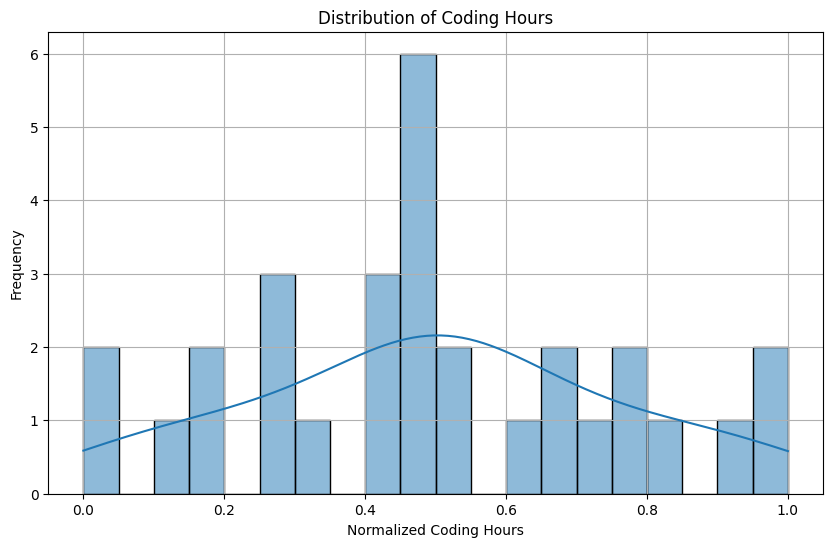

In [ ]:
## 1. Distribution of Coding_Hours
plt.figure(figsize=(10, 6))
sns.histplot(df['Coding_Hours'], bins=20, kde=True)
plt.title('Distribution of Coding Hours')
plt.xlabel('Normalized Coding Hours')
plt.ylabel('Frequency')
plt.grid()
plt.show()

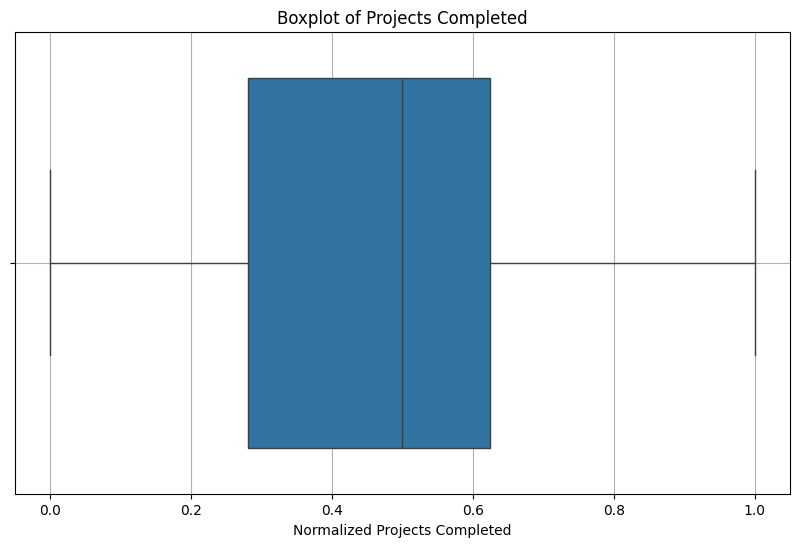

In [ ]:
## 2. Outliers in Projects_Completed
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Projects_Completed'])
plt.title('Boxplot of Projects Completed')
plt.xlabel('Normalized Projects Completed')
plt.grid()
plt.show()

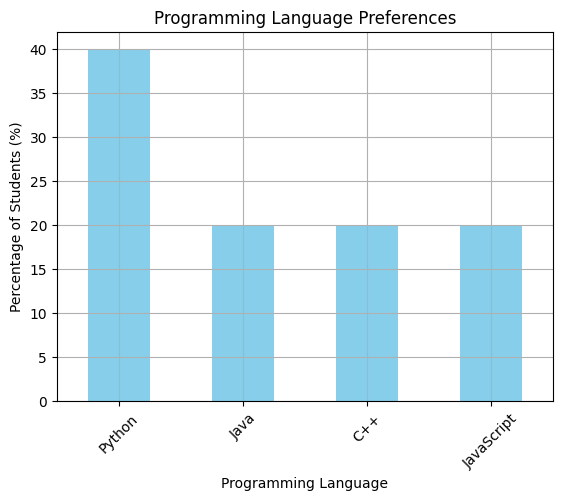

In [ ]:
## 3. Programming Language Preferences
language_counts = df['Programming_Language'].value_counts(normalize=True) * 100
language_counts.plot(kind='bar', color='skyblue')
plt.title('Programming Language Preferences')
plt.xlabel('Programming Language')
plt.ylabel('Percentage of Students (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
## 4. Skewness of Coding_Hours
skewness = df['Coding_Hours'].skew()
print(f"Skewness of Coding Hours: {skewness}")

Skewness of Coding Hours: 0.010949827032855474


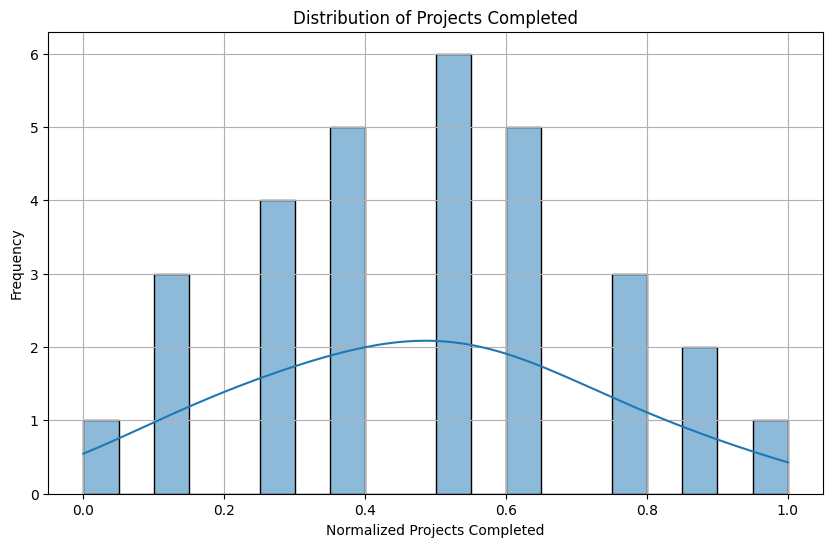

In [ ]:
## 5. Normal Distribution of Projects_Completed
plt.figure(figsize=(10, 6))
sns.histplot(df['Projects_Completed'], bins=20, kde=True)
plt.title('Distribution of Projects Completed')
plt.xlabel('Normalized Projects Completed')
plt.ylabel('Frequency')
plt.grid()
plt.show()

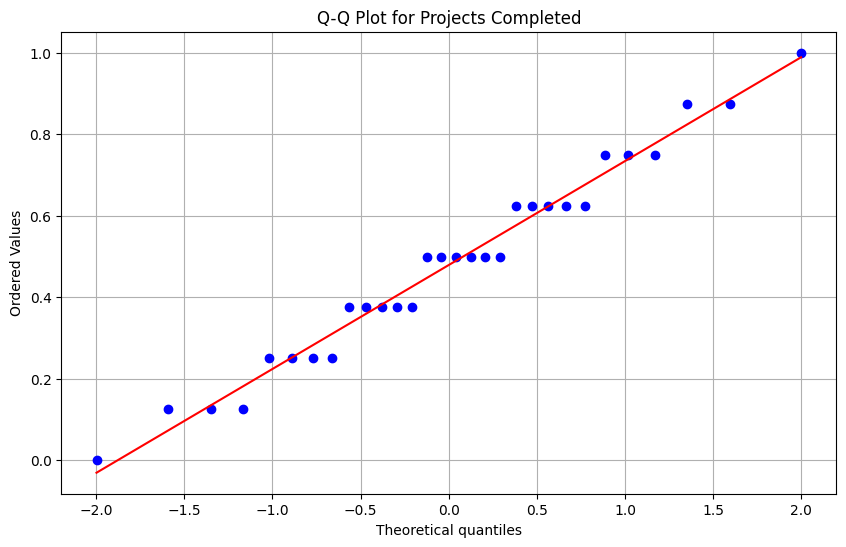

In [ ]:
# Check for normality using Q-Q plot
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(df['Projects_Completed'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Projects Completed')
plt.grid()
plt.show()